# Proyecto Pronósticos y predicciones 

# Tabla de contenidos <a id='back'></a>

* [Descripción del proyecto](#Proyecto)
    * [Introducción](#Introduccion)
    * [Diccionario de datos](#Diccionario)
* [Etapa 1. Descripción de los datos](#Descripcion)
* [Etapa 2. Preprocesamiento de datos](#Preprocesamiento)
* [Etapa 3. Análisis exploratorio de datos (EDA)](#Analisis)
* [Etapa 4. Construcción y Evaluación de Modelos de Clasificación](#Modelos)
* [Etapa 5. Creación de Clústeres de usuarios](#Clusteres)
* [Etapa 6. Conclusiones](#Conclusion)

# Descripción del proyecto<a id='Proyecto'></a>

# Introducción<a id='Introduccion'></a>

La cadena de gimnasios Model Fitness enfrenta el desafío de la pérdida de clientes, un problema común en servicios por suscripción. Este proyecto busca desarrollar una estrategia basada en datos para abordar la retención de clientes. Para ello, se analizarán perfiles de usuarios, se identificarán factores clave asociados a la cancelación, y se elaborará un modelo predictivo de probabilidad de pérdida. Finalmente, se ofrecerán recomendaciones específicas para mejorar la interacción y fidelización de los clientes.

# Diccionario de datos<a id='Diccionario'></a>


* 'Churn' — la cancelación para el mes en cuestión
* Campos de dataset actuales:
* Datos del usuario del mes anterior
    * 'gender'.
    * 'Near_Location' — si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.
    * 'Partner' — si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).
    * 'Promo_friends' — si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).
    * 'Phone' — si el/la usuario/a aportó el número de teléfono.
    * 'Age'.
    * 'Lifetime' — el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.
* Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:
    * 'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año.
    * 'Month_to_end_contract' — los meses que faltan hasta que expire el contrato.
    * 'Group_visits' — si el/la usuario/a participa en sesiones grupales.
    * 'Avg_class_frequency_total' — frecuencia media de visitas por semana a lo largo de la vida del cliente.
    * 'Avg_class_frequency_current_month' — frecuencia media de visitas por semana durante el mes en curso.
    * 'Avg_additional_charges_total' — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

[Volver a Contenidos](#back)

# Descripción de los datos<a id='Descripcion'></a>

In [1]:
#Se importar todas las librerias necesarias:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

In [2]:
#Se cargan los datos

gym_churn = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
#Se muestra la información general del DataFrame

gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
#Se calcula la cantidad de duplicados del DataFrame
#Se muestran las primeras 5 lineas del DataFrame

print('Duplicados en los datos de gym_churn:', gym_churn.duplicated().sum())
gym_churn.head()

Duplicados en los datos de gym_churn: 0


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


No se encuentra ninguna condicion adicional necesaria para la lectura de los datos.

[Volver a Contenidos](#back)

# Preprocesamiento de los datos<a id='Preprocesamiento'></a>

In [5]:
#Se cambia el nombre de las columnas a minusculas

gym_churn.columns = gym_churn.columns.str.lower()

In [6]:
#Se cambia el tipo de los datos de la columna month_to_end_contract al tipo entero.

gym_churn['month_to_end_contract'] = gym_churn['month_to_end_contract'].astype(int)

Se aplicaron un par de cambios con el fin de mejorar la eficiencia en el manejo de los datos:

* Se convierte el nombre de las columnas a minusculas.
* Se elige cambiar el tipo de dato de la columna month_to_end_contract al tipo int, puesto a que no hay valores decimales en esta columna. 

[Volver a Contenidos](#back)

# Análisis exploratorio de datos (EDA)<a id='Analisis'></a>

**Busqueda de valores ausentes, promedio y desviación estandar.**

In [7]:
#Se revisan los valores estadisticos del DataFrame

gym_churn.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


No se detectan valores ausentes en ninguna de las columnas, ya que se entiende que las columnas señaladas con 0 y 1 son del tipo booleano, sin embargo se elije mantenerlas en el tipo entero ya que los modelos con los que se va a trabajar más adelante interpretan automáticamente los valores 0 y 1 como categorías binarias.

Se observa lo siguiente respecto los valores promedio, y su desviación estandar:

* Hay una distribución **equitativa entre hombres y mujeres**.
* El rango de edad va de los **18 a los 41 años**, con una media de 29.18 años y una desviación estándar de 3.26 años.
* El **84.5%** de los clientes viven o trabajan **cerca del gimnasio.**
* El **48.7%** de los clientes están **afiliados a empresas asociadas.**
* El **30.8%** de los clientes se registraron con la **promoción de amigos.**
* La media de la **duración de los contratos es de 4.68 meses**, lo que indica que los clientes prefieren contratos de duración moderada.
* La mayoría de los clientes no tienen una relación prolongada con el gimnasio, ya que la **media del tiempo de vida es de 3.72** meses.
* Hay una media de **1.87 visitas por semana en general** y una media de **1.76 visitas por semana durante el mes actual.**
* Algunos clientes gastan significativamente en **servicios adicionales, con una media de 146.94**.
* El **26.5% de los clientes cancelaron su suscripción** en el período analizado.

**Analisis de valores medios de las características de los usuarios que cancelaron su suscripción.**

In [8]:
#Se calcula el promedio de cada caracteristica en función de la columna 'churn'

groupen_means = gym_churn.groupby('churn').mean()
print(groupen_means)

         gender  near_location   partner  promo_friends     phone  \
churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       contract_period  group_visits        age  avg_additional_charges_total  \
churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       month_to_end_contract  lifetime  avg_class_frequency_total  \
churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       avg_class_frequency_current_month  
churn                                     
0                               2.0

Se notan las siguientes diferencias en el compartamiento de los usuarios:

* Se detecta que los usuarios que **viven cerca del gimnasio** tienen una mayor tasa de permanencia (87%) respecto a los que viven lejos(76%).
* Los usuarios que **trabajan en una compañia asociada** tienen mayor tasa de permanencia del 53% frente al 35% de los usuarios que no.
* Solo el 18.4% de los clientes que se van **usaron promociones de amigos**, en comparación con el 35.3% de los que permanecen.
* Los clientes que permanecen tienen **contratos significativamente más largos** (promedio de 5.7 meses) frente a los que se van (1.7 meses).
* Los clientes leales **gastan más en servicios adicionales** (158) en comparación con los que se van (115).
* **El tiempo promedio desde que los clientes se inscribieron es significativamente mayor** para los que permanecen (4.7 meses) en comparación con los que se van (1 mes).

**Histogramas de barras y distribuciones de características para aquellas personas que se fueron y para las que se quedaron.**

In [9]:
#Se crea una lista de características numéricas para analizar

numeric_features = [
    'age', 'contract_period', 'lifetime',
    'avg_additional_charges_total', 'avg_class_frequency_total',
    'avg_class_frequency_current_month'
]

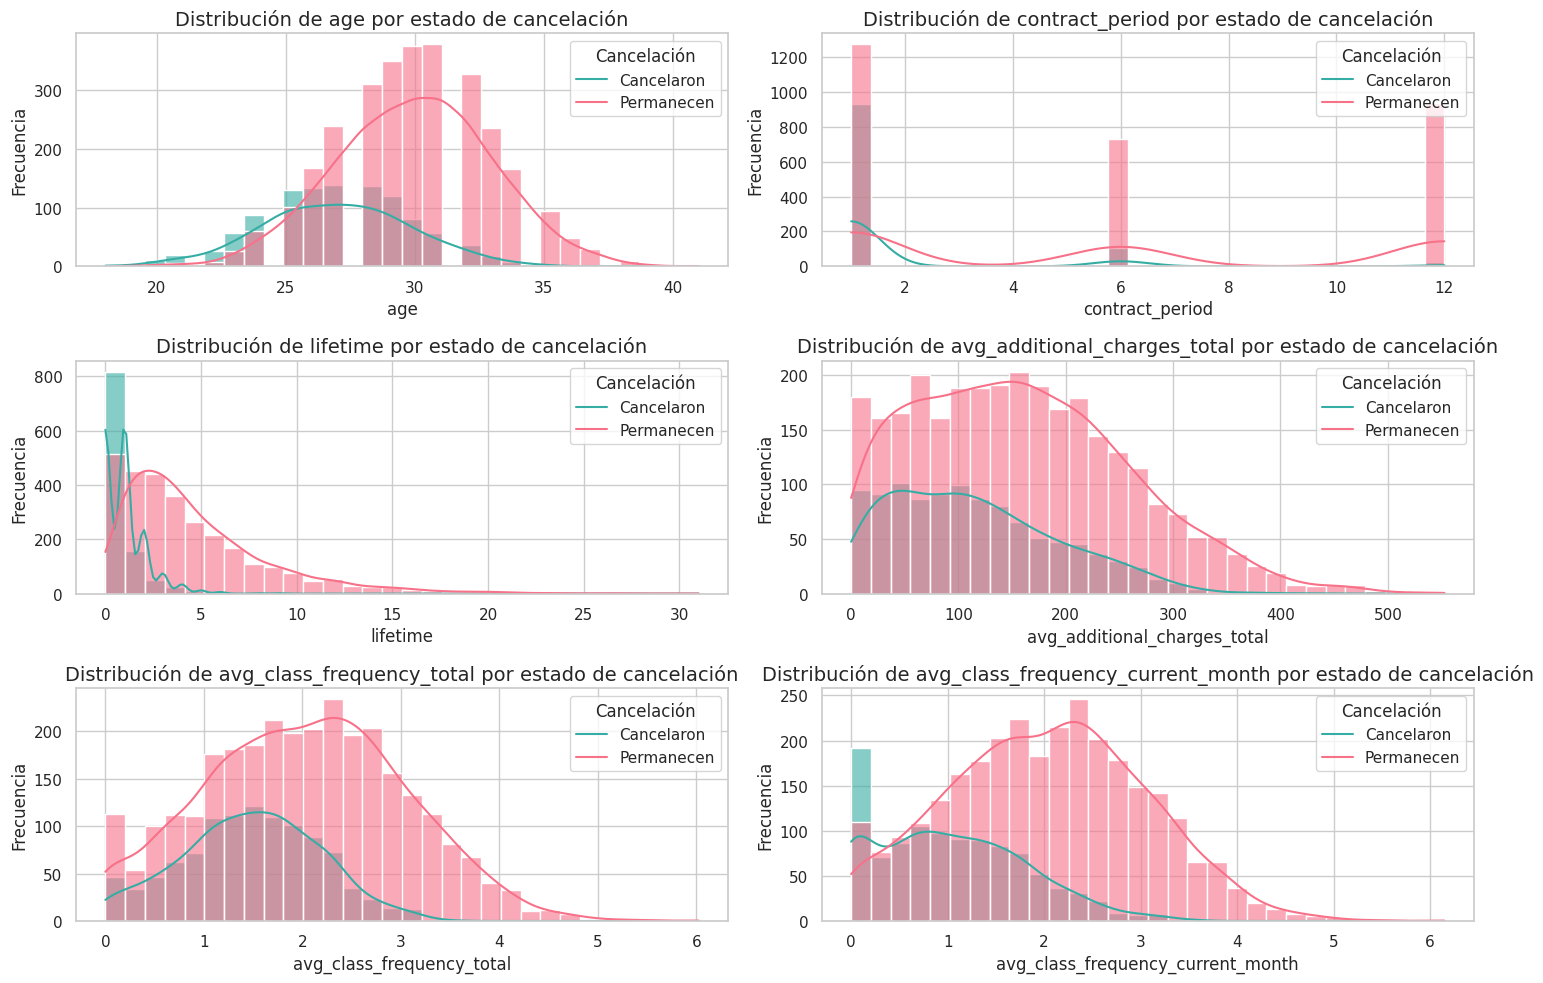

In [10]:
#Se crean histogramas de barras y distribuciones de caracteristicas separando los datos por el valor de cancelación

sns.set(style="whitegrid")

#Se crea la cuadrícula de subgráficos
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

#Se aplanan los ejes para facilitar la indexación
axes = axes.flatten()

#Se traza cada gráfico en la cuadrícula
for i, feature in enumerate(numeric_features):
   
    sns.histplot(data=gym_churn, x=feature, hue='churn', kde=True, bins=30, palette="husl", alpha=0.6, ax=axes[i])
    
    axes[i].set_title(f'Distribución de {feature} por estado de cancelación', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Frecuencia', fontsize=12)
    axes[i].legend(['Cancelaron', 'Permanecen'], title='Cancelación', loc='upper right')

plt.tight_layout()
plt.show()

Luego de analizar los graficos obtenidos se púede destacar lo siguiente:

* **La proporcion de usuarios jovenes que cancela su suscripción es mayor.** Este fenómeno se reduce conforme la edad de los usuarios incrementa.
* **El contrato más común es el de 1 mes**, reflejando una preferencia por compromisos a corto plazo. **Los contratos de 12 meses** muestran la mayor diferencia entre los usuarios que permanecen y los que cancelan, destacando que quienes optan por esta modalidad **son más propensos a permanecer**. En menor medida, los contratos de 6 meses también presentan una diferencia notable entre los dos grupos, manteniendo tambien en su mayoria la tendencia a la permanencia.
* Analizando el tiempo de vida de los usuarios en el gimnasio observamos que **la tasa de cancelación es alta durante el primer mes** pues más de 800 usuarios cancelan en este periodo, pero esta cifra disminuye abruptamente en los primeros cinco meses. Mientras que la tasa de permanencia se mantiene constante por un periodo más prolongado.
* Los usuarios que realizan compras adicionales en el gimnasio y permanecen son más numerosos en todos los niveles de gasto, tambien se puede notar que **los usuarios que cancelan tiene una tendencia a consumir productos de bajo costo**.
* **Los usuarios que permanecen suelen tener una mayor frecuencia de visitas en general**, lo que sugiere que el uso frecuente podría garantizar la retención. Se puede observar tambien que hay una gran cantidad de usuarios que cancelan su suscripcion sin presentarse a clases durante el mes actual.


**Matriz de correlación**

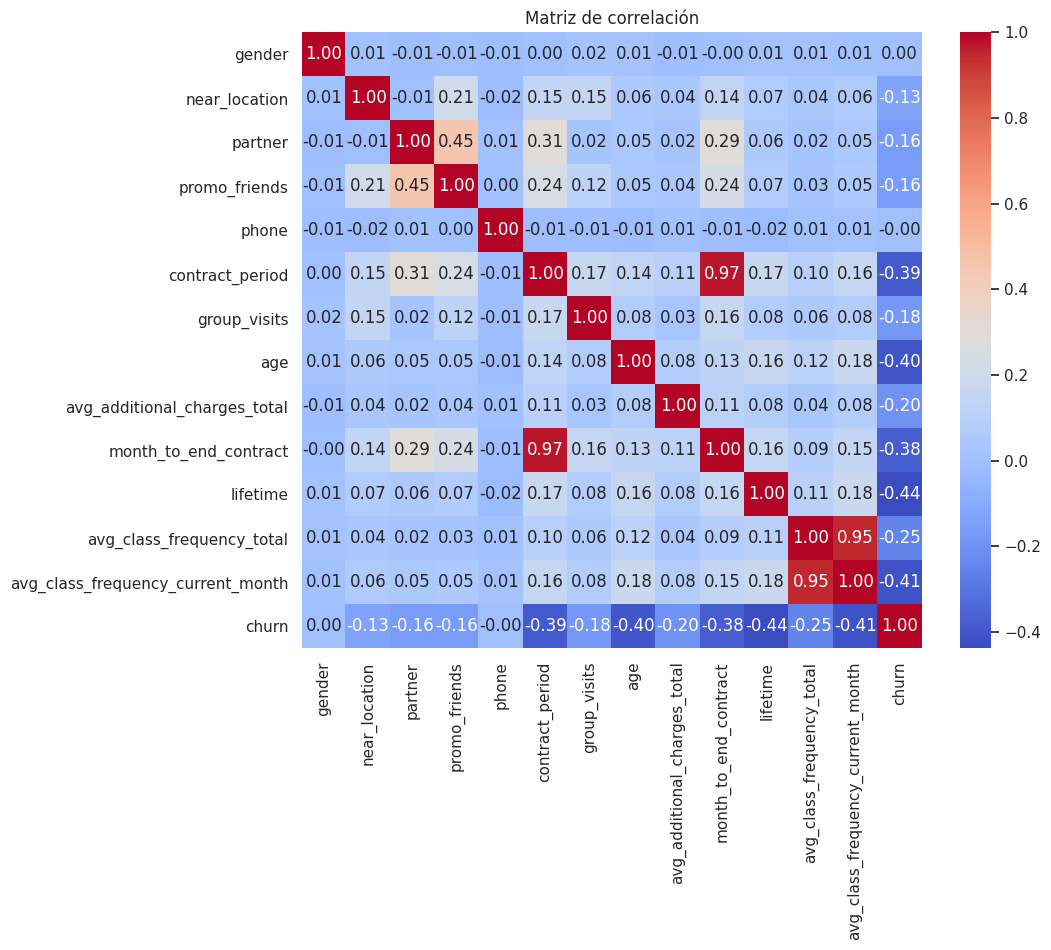

In [11]:
#Se genera una matríz de correlación del DataFrame
#Se muestra la matriz de correlación en un mapa de calor.

corr_m_gym_churn = gym_churn.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_m_gym_churn, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación")
plt.show()

Al analizar los resultados obtenidos en la matriz de correlación podemos señalar lo siguiente:

* La duración del contrato tiene una fuerte correlación negativa con churn (contract_period -0.39), indicando que **los usuarios con contratos más largos son menos propensos a cancelar.**
* Month_to_end_contract también tiene una correlación negativa significativa (-0.38), lo que refuerza la idea de que **cuanto más tiempo le quede al contrato, menor es la probabilidad de cancelar.**
* El tiempo total de vida en el gimnasio tiene una correlación negativa significativa con churn (lifetime -0.44). Esto sugiere que **los usuarios con más tiempo de relación con el gimnasio son menos propensos a cancelar.**
* La edad tiene una correlación negativa moderada con churn (-0.40). Esto indica que **los usuarios más jóvenes tienen mayor probabilidad de cancelar en comparación con los usuarios mayores.**
* La frecuencia de visitas a clases (avg_class_frequency_total -0.25 y avg_class_frequency_current_month -0.41) están negativamente correlacionadas con la cancelación esto sugiere que **los usuarios que asisten más frecuentemente a clases, tanto históricamente como en el mes actual, tienen menos probabilidad de cancelar.**
* Hay una correlación negativa moderada con las compras adicionales (-0.20), lo que indica que **los usuarios que gastan más en servicios adicionales del gimnasio tienden a cancelar menos.**
* La correlación negativa de la distancia del gimnasio sugiere que **vivir o trabajar cerca del gimnasio reduce ligeramente la probabilidad de cancelación**, pues hay una relación de -0.13
* **Los usuarios que se inscribieron con promociones de amigos tienen menos probabilidad de cancelar**, posiblemente debido a un mayor compromiso social, pues promo_friends tiene una correlación negativa de -0.16.
* La correlación negativa con las visitas grupales (-0.17) implica que **los usuarios que participan en actividades grupales también tienden a cancelar menos.**

[Volver a Contenidos](#back)

# Construcción y Evaluación de Modelos de Clasificación<a id='Modelos'></a>

**División de los datos**

In [12]:
#Se dividen los datos en conjuntos de entrenamiento y validación

X = gym_churn.drop('churn', axis=1)
y = gym_churn['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

**Modelo de Regresión Logística** 

In [13]:
#Se estandariza el conjunto de entrenamiento utilizando el método transform scaler
#Estos datos estandarizados se utilizan en todos los procesos posteriores

scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

In [14]:
#Se crear y se entrena el modelo de Regresión Logistica

logreg = LogisticRegression(random_state=0)
logreg.fit(X_train_st, y_train)

#Se utiliza el modelo entrenado para hacer la previsión

y_pred_logreg = logreg.predict(X_test_st)

print("---- Regresión Logística ----")
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, y_pred_logreg)))
print('Precisión: {:.2f}'.format(precision_score(y_test, y_pred_logreg)))
print('Recall: {:.2f}'.format((recall_score(y_test, y_pred_logreg))))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_logreg)))

---- Regresión Logística ----
Exactitud: 0.92
Precisión: 0.85
Recall: 0.83
F1: 0.84


**Modelo de Bosque Aleatorio**

In [15]:
#Se crear y se entrena el modelo de Bosque Aleatorio
#Se omite la estandarización para los datos del Bosque Aleatorio, pues no es necesario.

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

#Se utiliza el modelo entrenado para hacer la previsión

y_pred_rf = rf.predict(X_test)

print("\n---- Bosque Aleatorio ----")
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, y_pred_rf)))
print('Precisión: {:.2f}'.format(precision_score(y_test, y_pred_rf)))
print('Recall: {:.2f}'.format((recall_score(y_test, y_pred_rf))))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_rf)))


---- Bosque Aleatorio ----
Exactitud: 0.92
Precisión: 0.84
Recall: 0.82
F1: 0.83


**Comparación de Resultados**

In [16]:
#Se comparan los resultados

print("\n---- Comparación de Modelos: ----")
print('Regresión Logística - F1 Score: {:.2f}'.format(f1_score(y_test, y_pred_logreg)))
print('Bosque Aleatorio - F1 Score:: {:.2f}'.format(f1_score(y_test, y_pred_rf)))


---- Comparación de Modelos: ----
Regresión Logística - F1 Score: 0.84
Bosque Aleatorio - F1 Score:: 0.83


Al analizar los resultados obtenidos luego de ejecutar ambos modelos podemos señalar que ambos modelos muestran un rendimiento muy similar al predecir la cancelación de usuarios, con métricas de evaluación que destacan una **exactitud del 92% en ambos casos.** Al considerar la proporción de usuarios en el dataset, donde aproximadamente el 73.5% no cancelan (clase 0) y el 26.5% sí cancelan (clase 1), es importante destacar lo siguiente:

* Dado el desequilibrio en las clases, ambas técnicas mantienen un buen F1-Score, lo que demuestra que **los modelos están manejando el sesgo de clase de manera adecuada.**
* **La Regresión Logística tiene un F1-score ligeramente superior** (0.84 frente a 0.83) lo que sugiere un mejor balance entre precisión y recall. 
* Tambien se muestra una **precisión más alta (85%) en el modelo de Regresión Logística**, lo que significa que es mejor en evitar falsos positivos (predecir que un usuario cancelará cuando no lo hará).
* El **recall del (83%) de la Regresión Logística** indica que captura ligeramente más casos de usuarios que realmente cancelan.

Considerando que se busca maximizar la detección de usuarios que probablemente cancelen (recall), **la Regresión Logística sería la mejor opción para este proyecto.**

[Volver a Contenidos](#back)

# Creación de Clústeres de usuarios <a id='Clusteres'></a>

**Creación de matriz de distancias y visualización de dendrograma**

In [17]:
#Se usan los datos previamente estandarizados
X_cluster = pd.DataFrame(X_train_st, columns=X_train.columns)

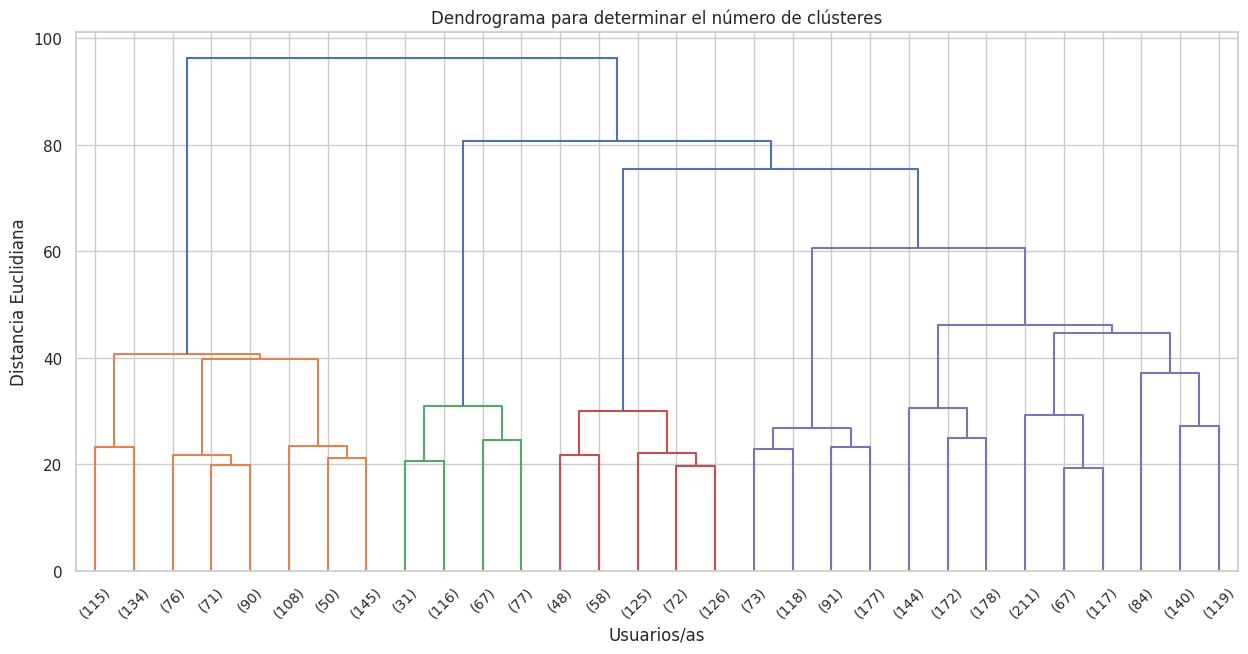

In [18]:
#Se crea el dendrograma

linked = linkage(X_cluster, method='ward')
plt.figure(figsize=(15, 7))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title('Dendrograma para determinar el número de clústeres')
plt.xlabel('Usuarios/as')
plt.ylabel('Distancia Euclidiana')
plt.show()


**Modelo de Clustering**


In [19]:
#Se define el modelo k_means con 5 clústeres
#Se predicen los clústeres para las observaciones

kmeans = KMeans(n_clusters=5, random_state=0)
X_cluster['cluster'] = kmeans.fit_predict(X_cluster)

In [20]:
#Se calculan los valores medios por clúster

cluster_means = X_cluster.groupby('cluster').mean()
print("Valores medios por clúster:")
print(cluster_means.round(3))

Valores medios por clúster:
         gender  near_location  partner  promo_friends  phone  \
cluster                                                         
0        -0.006          0.309    0.599          0.570  0.316   
1        -0.030         -2.395   -0.060         -0.517  0.316   
2        -0.044          0.418   -0.291         -0.167  0.316   
3         0.069          0.365   -0.224         -0.110  0.316   
4         0.043          0.060   -0.027         -0.031 -3.162   

         contract_period  group_visits    age  avg_additional_charges_total  \
cluster                                                                       
0                  1.379         0.301  0.258                         0.153   
1                 -0.494        -0.410 -0.184                        -0.105   
2                 -0.593        -0.152 -0.333                        -0.188   
3                 -0.446         0.098  0.290                         0.159   
4                 -0.015         0.016 -0.

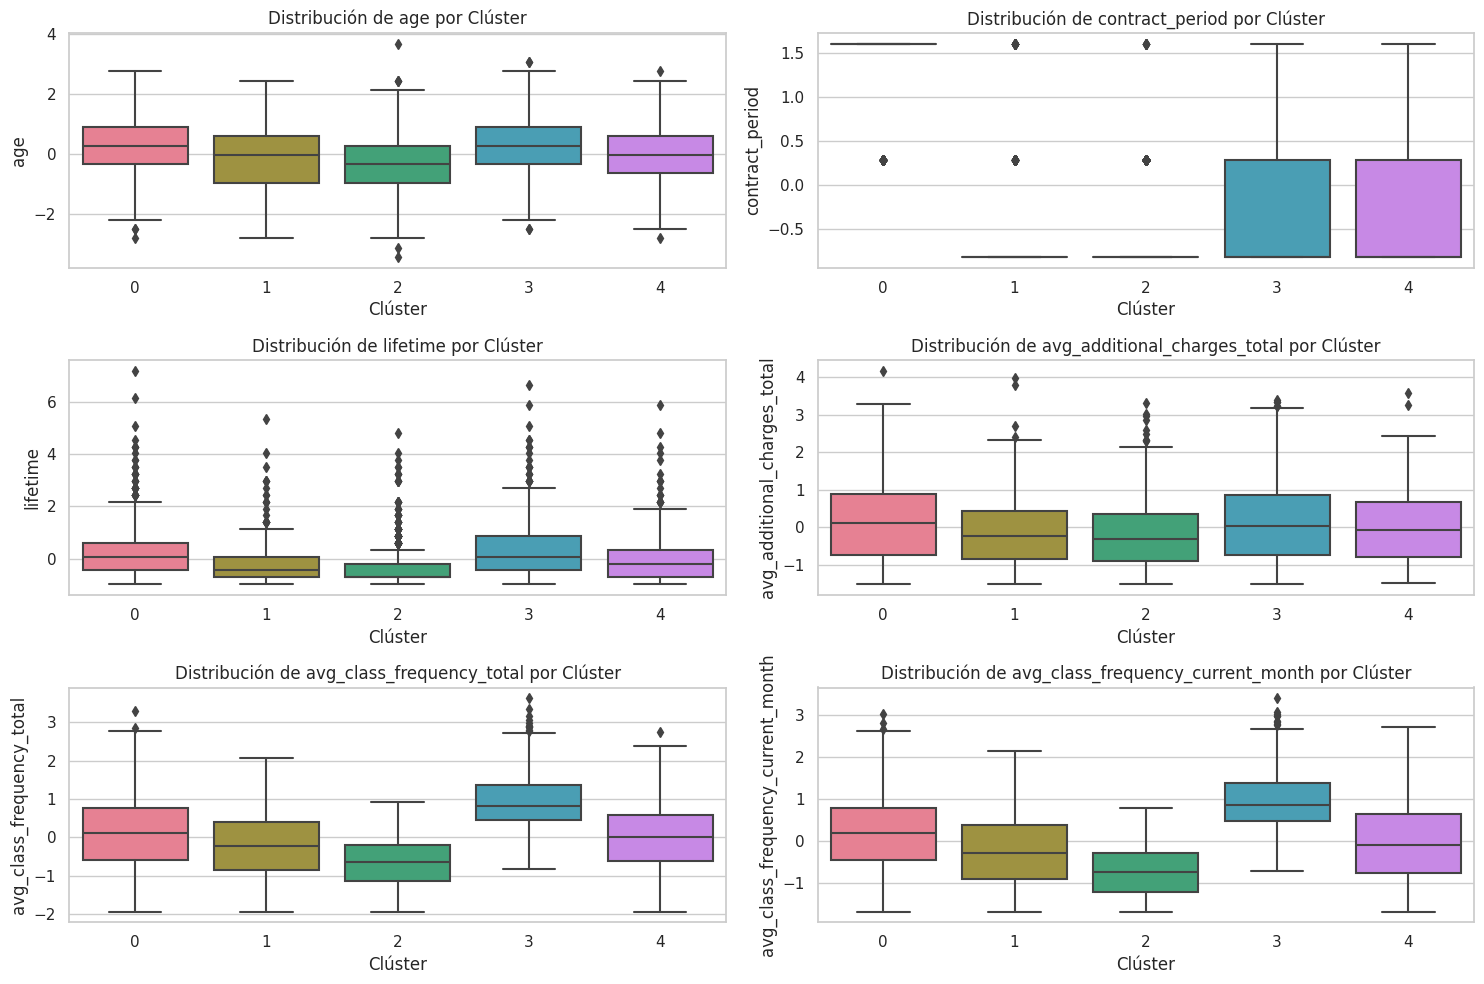

In [21]:
# Se grafican las distribuciones de características por clúster
# Se usan las columnas con caracteristicas numericas que ya se habian definido previamente

fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(data=X_cluster, x='cluster', y=feature, ax=axes[i], palette='husl')
    axes[i].set_title(f'Distribución de {feature} por Clúster')
    axes[i].set_xlabel('Clúster')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

In [22]:
# Se calcula la tasa de cancelación por clúster
# Se reincorpora la columna de cancelación al DataFrame original para calcular la tasa

X_cluster['churn'] = y_train.values
churn_rates = X_cluster.groupby('cluster')['churn'].mean()
print("\nTasa de cancelación por clúster:")
print(churn_rates.round(3)*100)


Tasa de cancelación por clúster:
cluster
0     2.9
1    43.4
2    53.1
3     7.1
4    28.5
Name: churn, dtype: float64


Luego de analizar toda la información obtenida para cada uno de los clusteres, podemos realizar las siguientes observaciones por cluster.

* **Clúster 0:**
    * Tasa de cancelación: 43.4%.
    * Perfil: Estos usuarios tienden a vivir lejos del gimnasio, tienen contratos cortos, baja frecuencia de clases y realizan pocos gastos adicionales. Esto sugiere que tienen una conexión limitada con el gimnasio, lo que aumenta su probabilidad de cancelar.

* **Clúster 1:**
    * Tasa de cancelación: 53.1% (la más alta).
    * Perfil: Este grupo destaca por tener la menor frecuencia de asistencia y los contratos más cortos. Reflejan un bajo nivel de participación, lo que los convierte en el grupo con mayor riesgo de cancelación.

* **Clúster 2:**
    * Tasa de cancelación: 7.1% (la segunda más baja).
    * Perfil: Estos usuarios se caracterizan por ser muy activos: asisten regularmente a clases y realizan gastos adicionales. Aunque prefieren contratos cortos, su compromiso con el gimnasio es evidente, lo que los hace menos propensos a cancelar.

* **Clúster 3:**
    * Tasa de cancelación: 2.9% (la más baja).
    * Perfil: Aquí encontramos a los usuarios más leales. Tienen contratos largos, asisten con frecuencia y aprovechan promociones sociales. Su participación activa y conexión con otros usuarios parece ser clave para su retención.

* **Clúster 4:**
    * Tasa de cancelación: 28.5%.
    * Perfil: Este grupo tiene características promedio en contratos y asistencia. Aunque su tasa de cancelación es menor que la de los clústeres 0 y 1, aún hay margen de mejora para fomentar su compromiso con el gimnasio.

[Volver a Contenidos](#back)

# Conclusiones y recomendaciones<a id='Conclusion'></a>

El análisis ha revelado patrones claros en el comportamiento de los clientes y factores clave que impactan la retención. Estos resultados subrayan la importancia de entender las diferentes necesidades de los usuarios. Grupos como los clústeres 0 y 1 necesitan **estrategias más enfocadas en motivarlos a asistir regularmente**, mientras que los clústeres 2 y 3 demuestran cómo **la actividad frecuente y la conexión social pueden ser determinantes para la retención.** Las recomendaciones que se sugieren son:

* **Fomentar Contratos de Mayor Duración:**
Los clientes con contratos más largos tienen tasas de cancelación significativamente más bajas. Ofrecer descuentos atractivos para planes de 6 o 12 meses, resaltando los beneficios de comprometerse a largo plazo, como acceso exclusivo a clases especiales o servicios adicionales, podría impactar positivamente en las tasas de permanencia.

* **Promocionar la Actividad Social y de Grupo:**
Las promociones que involucran a amigos o actividades grupales generan mayor retención. Crear programas como "Inscribe a un amigo y gana un mes gratis" o incentivar clases grupales podría fortalecer la conexión social y el compromiso.

* **Incentivar el Uso Regular:**
La frecuencia de asistencia es un indicador clave de retención. Establecer recompensas por metas de asistencia, como una clase gratuita tras asistir 10 veces al mes, puede motivar a los usuarios a mantener la constancia.

* **Personalizar la Experiencia para Clientes en Riesgo:**
Los usuarios con contratos cortos, baja frecuencia de visitas o ubicaciones lejanas necesitan atención especial. Ofrecer promociones específicas o recordatorios personalizados puede reengancharlos antes de que cancelen.

Estas acciones no solo abordarían las áreas más vulnerables, sino que también reforzarían el compromiso de los clientes más leales, garantizando un crecimiento sostenible para la cadena de gimnasios.

[Volver a Contenidos](#back)